# напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from numpy.linalg import inv

def hypothesis(A, B, X):
        return np.dot(X, A) + B

# створіть функцію для обчислення функції втрат у векторному вигляді

In [2]:
def compute_cost(A, B, X, Y):
    m = len(Y)
    error = hypothesis(A, B, X) - Y
    return (1 / (2 * m)) * np.sum(error**2)
#print("Calc:", compute_cost(A=1, B=5, X=np.array([1, 2, 3]), Y=[6.1, 6.8, 8.05]))
#print("Test:", (0.1**2 + (-0.2)**2 + 0.05**2) / (3 << 1))
#print("Calc:", compute_cost(A=[1,2], B=5, X=np.array([[1,1], [2,2], [3,3]]), Y=[6.1, 6.8, 8.05]))
#print("Test:", ((6.1-(1*1+1*2+5))**2 + (6.8-(2*1+2*2+5))**2 + (8.05-(3*1+3*2+5))**2) / (3 << 1))

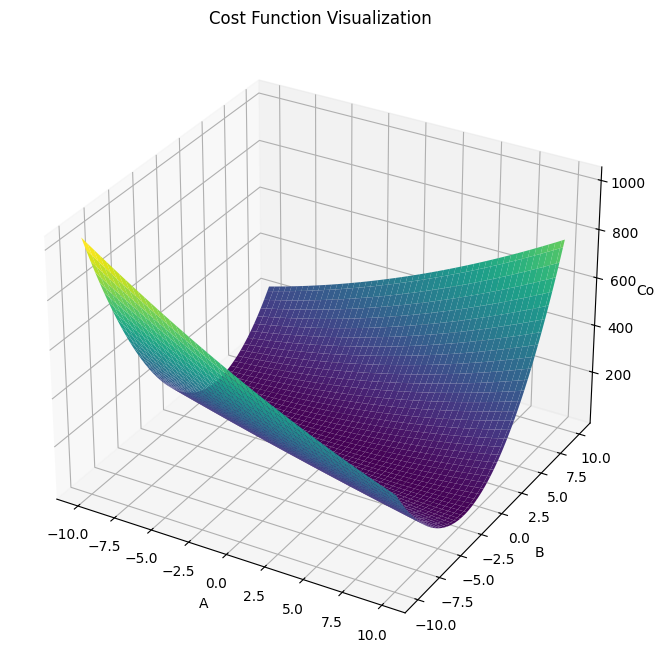

In [3]:
def visuilisation(X = np.array([1, 2, 3, 4, 5]), Y = np.array([1, 3, 2, 3, 5]), size_a=10, size_b=10):
    A_range = np.linspace(-size_a, size_a, 100)
    B_range = np.linspace(-size_b, size_b, 100)
    A_values, B_values = np.meshgrid(A_range, B_range)
    
    # Compute the cost for all combinations of A and B
    cost_values = np.zeros(A_values.shape)
    for i in range(A_range.size):
        for j in range(B_range.size):
            cost_values[i, j] = compute_cost(A_range[i], B_range[j], X, Y)
    
    # Create a 3D plot
    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(A_values, B_values, cost_values, cmap='viridis')
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('Cost')
    ax.set_title('Cost Function Visualization')
    return plt.show()

visuilisation()

# реалізуйте один крок градієнтного спуску

In [10]:
def gradient_descent_step(A, B, X, Y, step):
    #A = np.random.randint()
    error = hypothesis(A, B, X) - Y
    for i in range(len(A)):
        A[i] -= (error * X[:,i]).sum() * step
    B -= error.sum() * step
    return A, B


step=0.001; Y=np.array([8, 11, 14, 17, 21], dtype=np.float_); X=np.array([[1,1], [2,2], [3,3], [10,1], [10,3]], dtype=np.float_); A=np.array([0,0], dtype=np.float_); B=0
THRESHOLD = 0.000000000000000001
for _ in range(500000):
    if compute_cost(A=A, B=B, X=X, Y=Y) < THRESHOLD:
      break
    A, B = gradient_descent_step(A=A, B=B, X=X, Y=Y, step=step)
print("Test:", "\n" "A =", A, "\n" "B =", B, "\n" "Y", hypothesis(A, B, X))

Test: 
A = [1. 2.] 
B = 4.999999996236746 
Y [ 8. 11. 14. 17. 21.]


# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

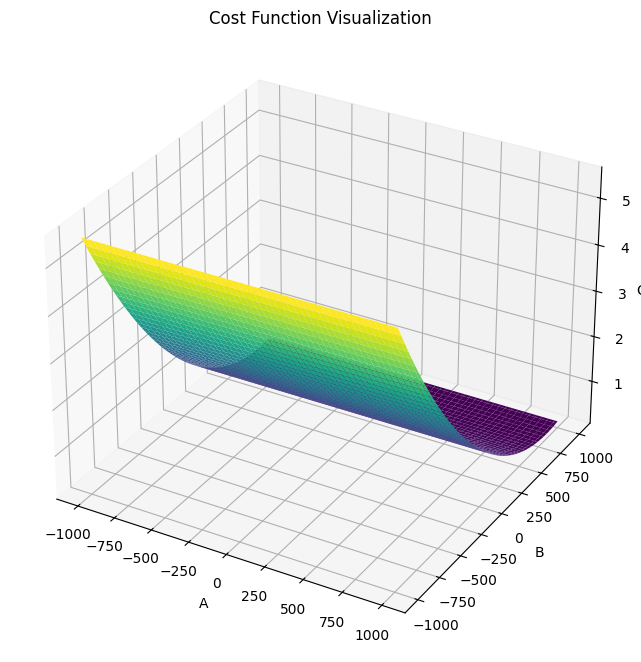

In [5]:
file_path = "./Housing.csv"
df = pd.read_csv(file_path)
selected_features = ['area', 'bedrooms', 'bathrooms']
x = df[selected_features].values
y = df['price'].values
visuilisation(df.area,y, 1000, 1000)

In [29]:
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)

    return result


norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
x = np.array([norm['area'].values,df['bedrooms'].values,df['bathrooms'].values]).T
y = norm['price'].values
visuilisation(x, y, 1, 1)

ValueError: operands could not be broadcast together with shapes (545,3) (545,) 

In [30]:
num_iterations = 200
print(type(A))
print(x.shape)
for _ in range(500000):
    if compute_cost(A=A, B=B, X=x, Y=x) < THRESHOLD:
      break
    A, B = gradient_descent_step(A=A, B=B, X=x, Y=y, step=step)
print("Test:", "\n" "A =", A, "\n" "B =", B, "\n" "Y", hypothesis(A, B, x))
#for i in range(num_iterations):
#    A, B = gradient_descent_step(A, B, x, y, step)
#    print(f"Найкращі параметри w{i}: A = {A}, B = {B}")

<class 'numpy.ndarray'>
(545, 3)


ValueError: shapes (545,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

# знайдіть ці ж параметри за допомогою аналітичного рішення

In [ ]:
theta_analytical = inv(x.T @ X_normalized) @ x.T @ y
print("Параметри w за допомогою аналітичного рішення:", theta_analytical)

In [ ]:
x_example = [7420,4,2]
print(theta)
print(f"Ціна за квартиру {int(hypothesis(theta, x_example))}")